<a href="https://colab.research.google.com/github/abhisheksdss/INSE_6220_project/blob/main/INSE_6220_40181645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Librarires**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.preprocessing import label_binarize
from sklearn import svm
from numpy import linalg as LA
from sklearn.multiclass import OneVsRestClassifier

**Upload dataset fie**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


**Read file**

In [5]:
df =pd.read_csv('data.csv')
df.columns
df.head(11)

,AREA,PERIMETER,SOLIDITY,CONVEX_AREA,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,491606,2525.6931,0.9952,493956,1.1145,0.9684,0.9457,IRAQI
1,399815,2296.2310,0.9924,402885,1.1787,0.9529,0.9192,IRAQI
2,440427,2391.8450,0.9967,441904,1.2669,0.9674,0.8882,IRAQI
3,429538,2421.3320,0.9934,432406,1.3786,0.9207,0.8489,IRAQI
4,346264,2140.3511,0.9927,348820,1.2514,0.9498,0.8921,IRAQI
5,493734,2577.7070,0.9937,496873,1.3426,0.9338,0.8621,IRAQI
6,375285,2207.1880,0.9939,377576,1.0653,0.9680,0.9681,IRAQI
7,419416,2340.7871,0.9960,421118,1.1614,0.9619,0.9269,IRAQI
8,414712,2341.4580,0.9955,416592,1.2337,0.9506,0.8993,IRAQI
9,411273,2358.1951,0.9889,415907,1.2650,0.9294,0.8861,IRAQI


In [6]:
df.head()

,AREA,PERIMETER,SOLIDITY,CONVEX_AREA,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,491606,2525.6931,0.9952,493956,1.1145,0.9684,0.9457,IRAQI
1,399815,2296.2310,0.9924,402885,1.1787,0.9529,0.9192,IRAQI
2,440427,2391.8450,0.9967,441904,1.2669,0.9674,0.8882,IRAQI
3,429538,2421.3320,0.9934,432406,1.3786,0.9207,0.8489,IRAQI
4,346264,2140.3511,0.9927,348820,1.2514,0.9498,0.8921,IRAQI


**Testing for empty values**

In [7]:
df.dtypes
df.isnull().sum()
# no null values and hence no replacing
#df.fillna(df.mean(),inplace=True)
#df = df.dropna()

AREA            0
PERIMETER       0
SOLIDITY        0
CONVEX_AREA     0
ASPECT_RATIO    0
ROUNDNESS       0
COMPACTNESS     0
Class           0
dtype: int64

**class**

In [8]:
Y= df['Class']
print(Y)

0       IRAQI
1       IRAQI
2       IRAQI
3       IRAQI
4       IRAQI
        ...  
212    SAFAVI
213    SAFAVI
214    SAFAVI
215    SAFAVI
216    SAFAVI
Name: Class, Length: 217, dtype: object


In [9]:
Y= df['Class']
df.drop(['Class',],axis=1,inplace=True)

**Counting the Number of Date Types**

<Axes: title={'center': 'Count of different varieties of Dates'}>

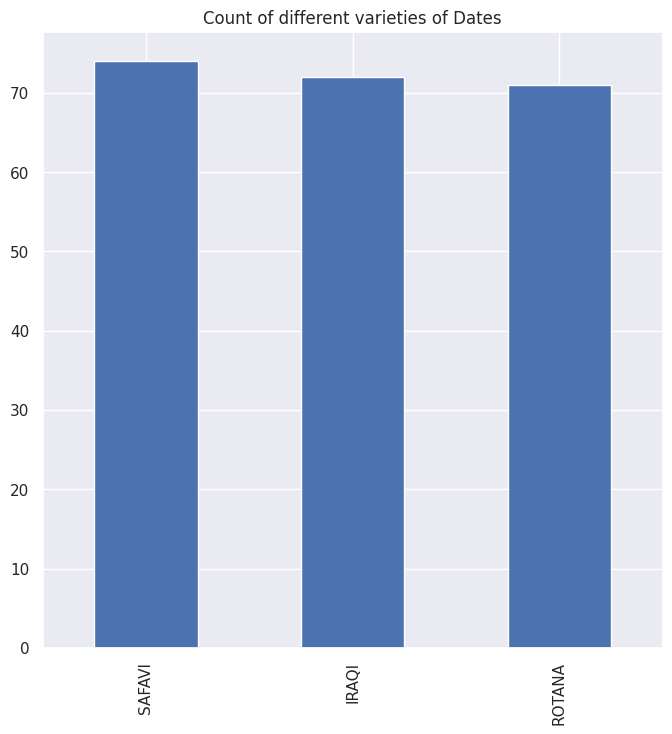

In [10]:
plt. figure(figsize=(8,8))
plt.title("Count of different varieties of Dates")
Y.value_counts().plot(kind = 'bar')

**data normalizing**

In [11]:
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          217 non-null    float64
 1   PERIMETER     217 non-null    float64
 2   SOLIDITY      217 non-null    float64
 3   CONVEX_AREA   217 non-null    float64
 4   ASPECT_RATIO  217 non-null    float64
 5   ROUNDNESS     217 non-null    float64
 6   COMPACTNESS   217 non-null    float64
dtypes: float64(7)
memory usage: 12.0 KB


**statistics**

In [12]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216]
['AREA', 'PERIMETER', 'S

**visualization of data**

**A box plot is used to visualize the data**

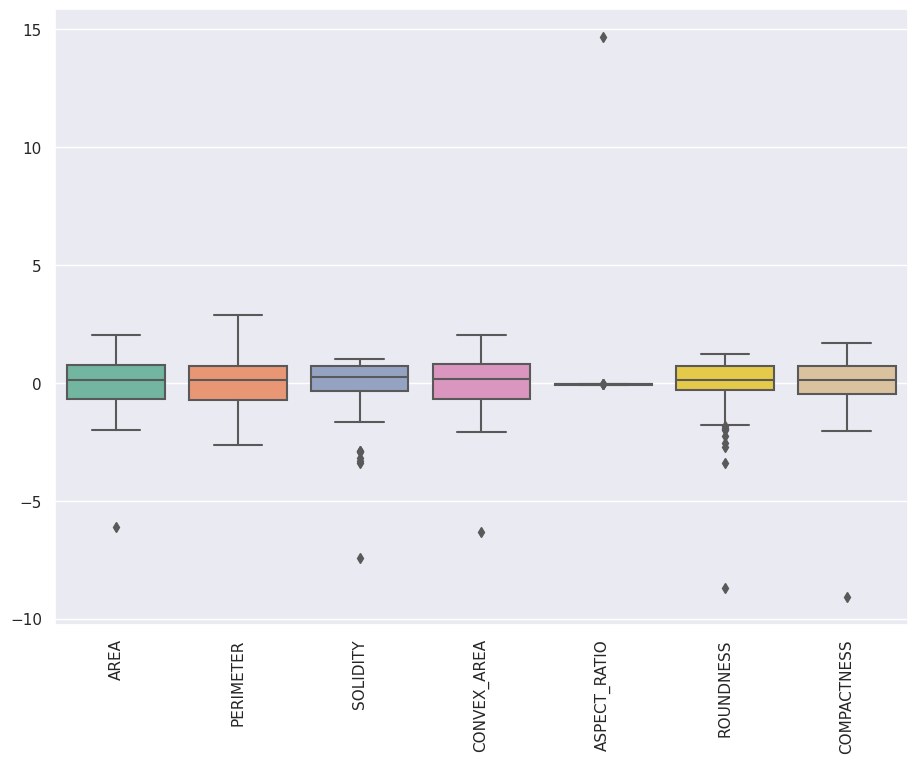

In [13]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1)
ax=sns.boxplot(data=df, orient="v", palette="Set2")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

**Datapoints and boxes are displayed in a stripplot**

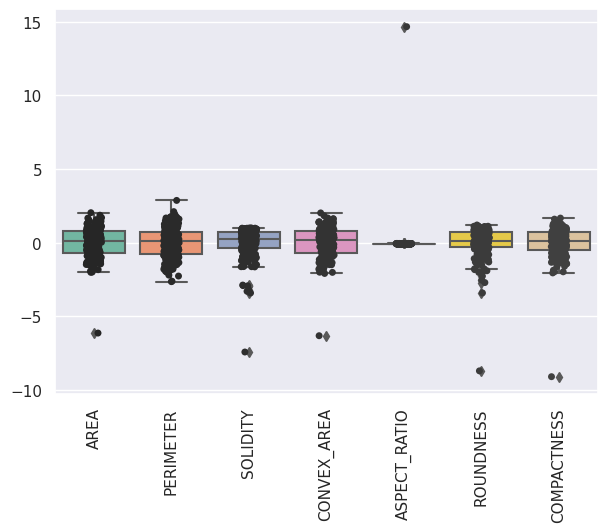

In [14]:
sns.set(rc={'figure.figsize':(7,5)}, font_scale=1)
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

**pairplot**

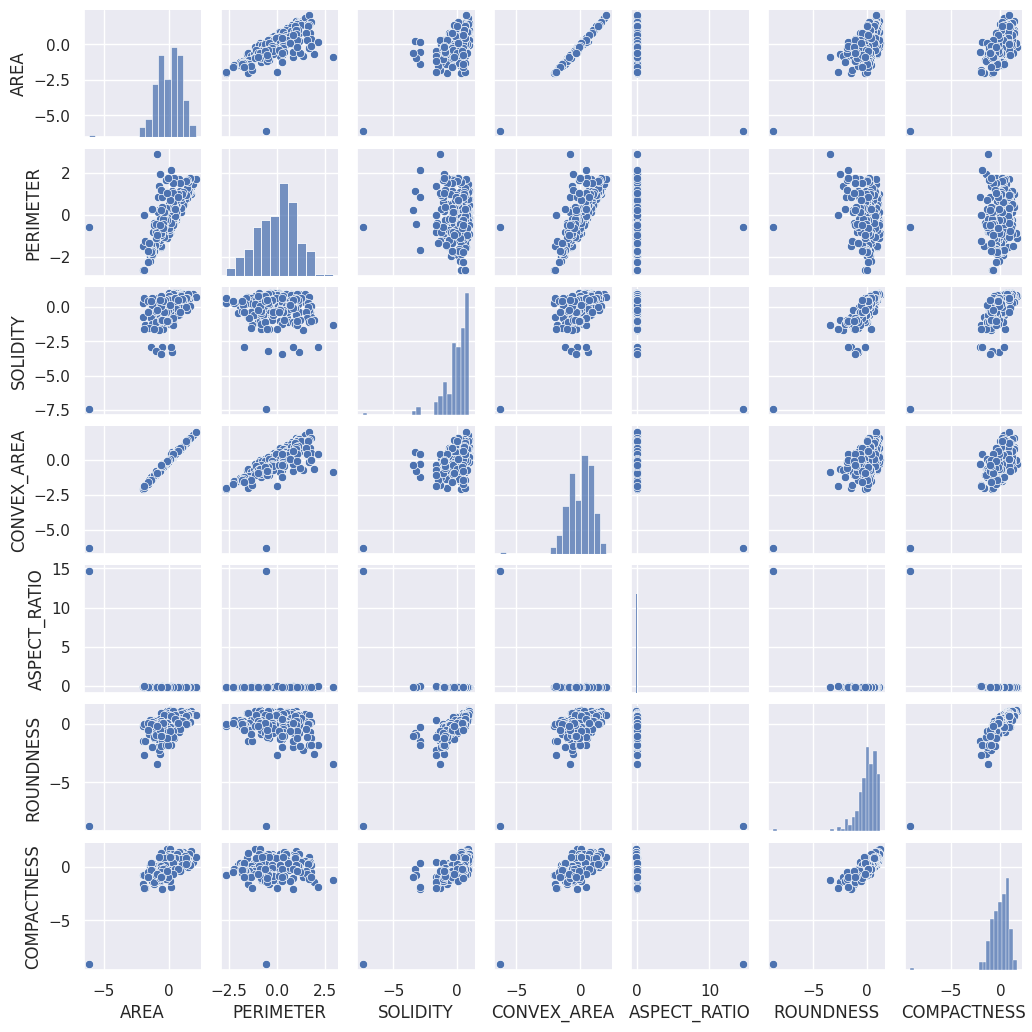

In [15]:
g=sns.pairplot(df,height=1.5)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

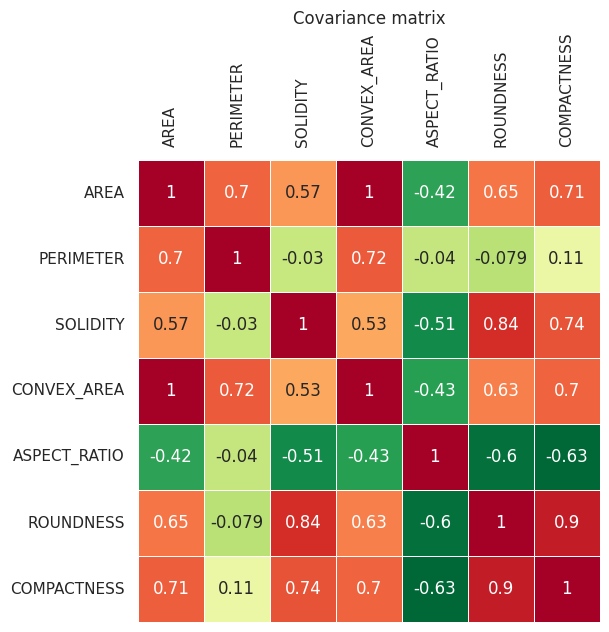

In [16]:
dfc = df - df.mean() #centered data
plt. figure(figsize=(6,6))
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

**Eigen vectors and eigen values calculation**

In [17]:
w, v = LA.eig(dfc.cov())

**eigen values**

In [18]:
w

array([4.43109544e+00, 1.66099709e+00, 5.61263022e-01, 2.48586437e-01,
       9.54817121e-02, 3.76438179e-05, 2.53865704e-03])

**eigen vectors**

In [19]:
v

array([[ 0.4310111 ,  0.31358914,  0.11142138, -0.03052435,  0.24870485,
         0.70369584,  0.3814484 ],
       [ 0.18143164,  0.70573799, -0.12289859,  0.1906839 , -0.29843916,
         0.01810385, -0.57285107],
       [ 0.37786983, -0.30192162,  0.33795495,  0.76741369, -0.23743831,
        -0.06161473,  0.05241268],
       [ 0.42466759,  0.33821765,  0.04571155, -0.09059357,  0.27742407,
        -0.70670336,  0.34434833],
       [-0.31600434,  0.24078967,  0.89923232, -0.16719555, -0.06588854,
        -0.02999946, -0.01863319],
       [ 0.4164946 , -0.32023289,  0.2112091 , -0.23248672,  0.47481351,
         0.01889124, -0.63207518],
       [ 0.42995037, -0.19369853,  0.05431445, -0.53251528, -0.69710095,
        -0.00124905,  0.07176131]])

**PCA**

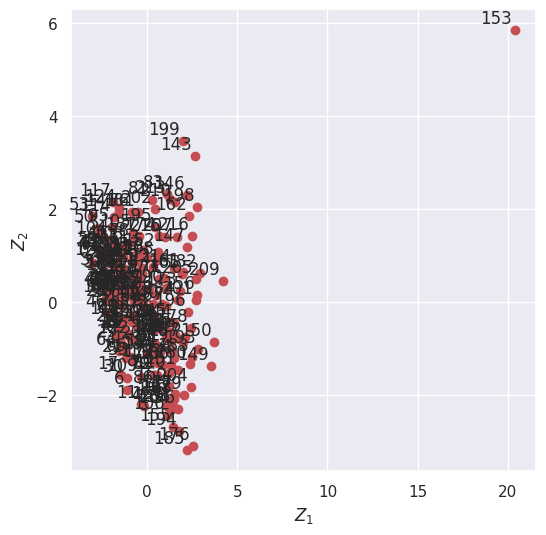

In [20]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
plt. figure(figsize=(6,6))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations, Z[:,0], Z[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigen vector plot**

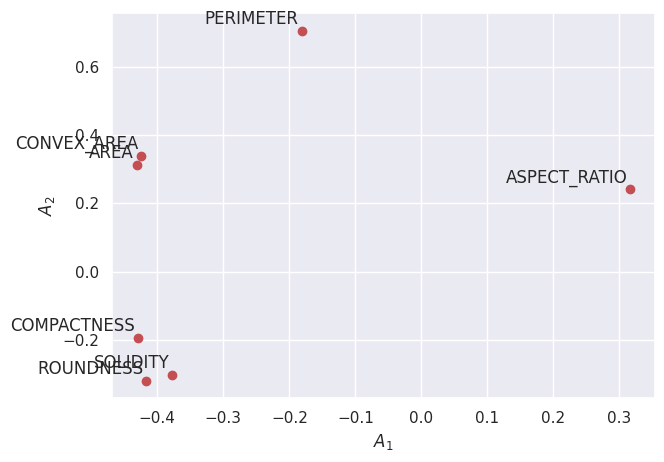

In [21]:
A = pca.components_.T
#print(A.round(4))
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:,0],A[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

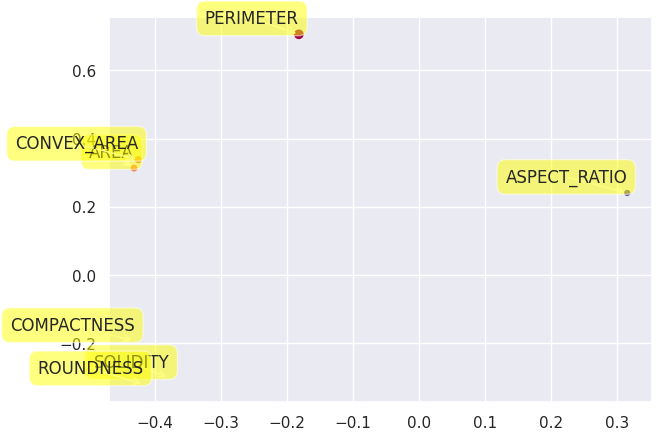

In [22]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

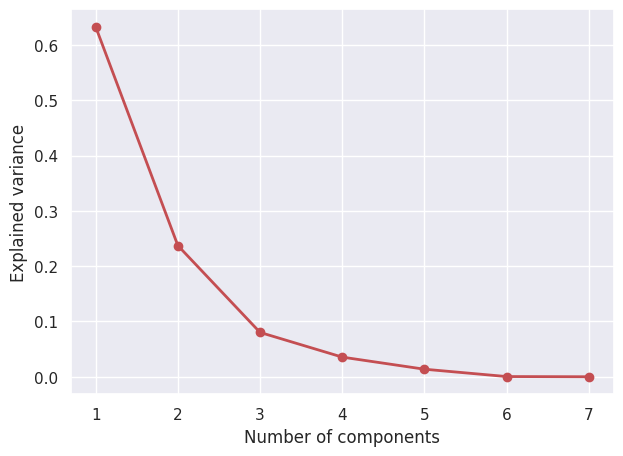

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**explained variance**

[63.3 23.7  8.   3.6  1.4  0.   0. ]


Text(0, 0.5, 'Cumulative explained variance')

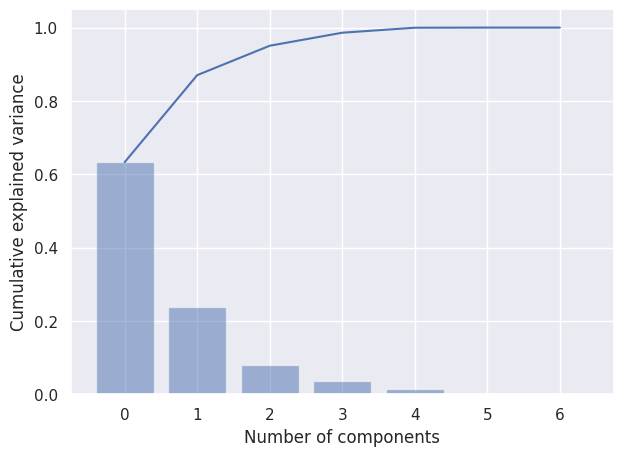

In [24]:
#Explained variance
ell = pca.explained_variance_ratio_
print(ell.round(3)*100)
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**biplot**

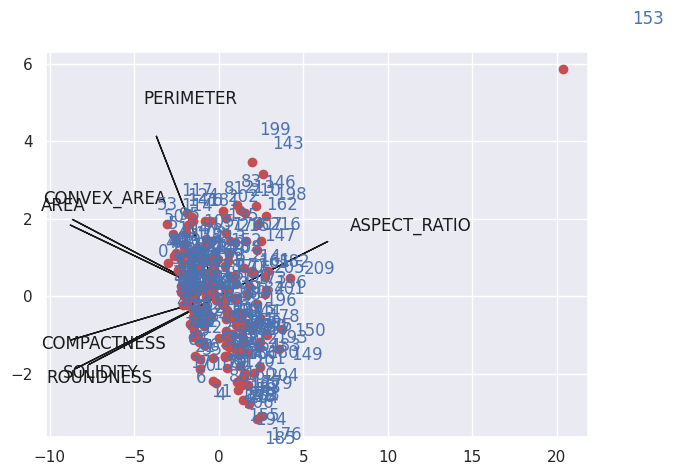

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal components**

Text(0.5, 1.0, 'Principal components')

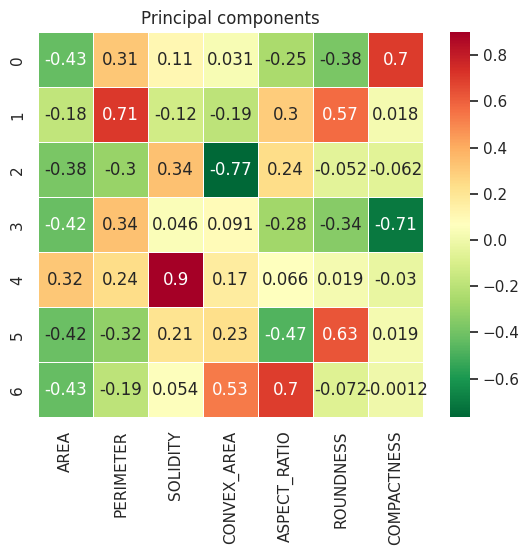

In [26]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, 
            square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

**hotelling t-squared test**

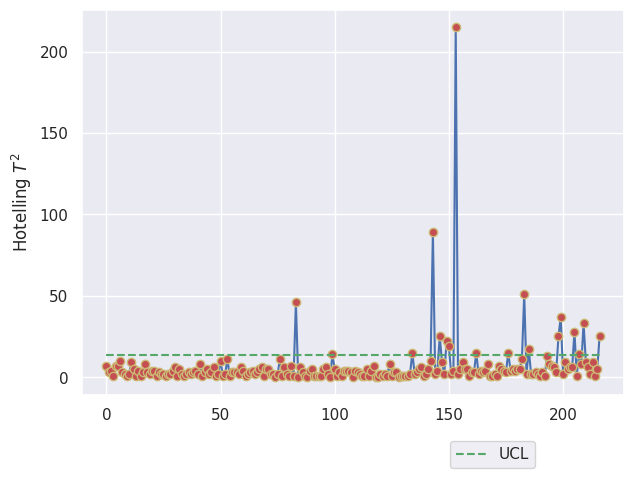

In [27]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda)) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**outside upper control limit points**

In [28]:
print (np.argwhere(Tsquare>UCL))

[[ 83]
 [ 99]
 [134]
 [143]
 [146]
 [149]
 [150]
 [153]
 [162]
 [176]
 [183]
 [185]
 [198]
 [199]
 [205]
 [207]
 [209]
 [216]]


**principal components control charts**

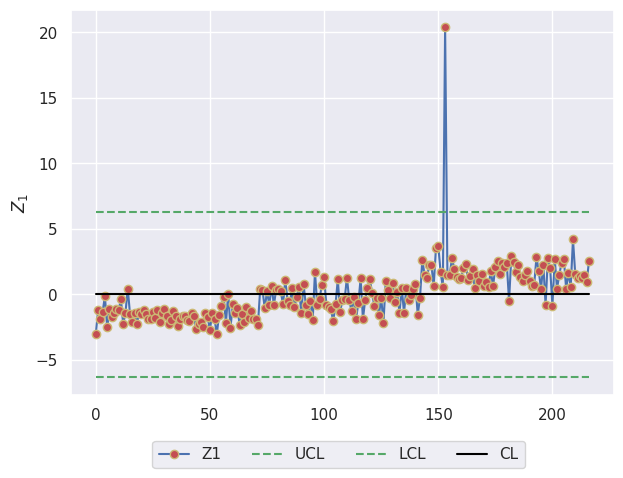

In [29]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

In [30]:
#Accuracy of the dataset with two classification algorithms

KNN_model = KNeighborsClassifier(n_neighbors=5)
scoring=['accuracy']
scores_knn_full_data =cross_validate(KNN_model, df,Y,cv=5, scoring=scoring)
scores_knn_Z = cross_validate(KNN_model,Z, Y,cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(KNN_model, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]
  scores_dict["knn_full_data " + i ]=scores_knn_full_data[i]
  scores_dict["knn_Z " + i ]=scores_knn_Z[i]
  scores_dict["knn_Z12 " + i ]=scores_knn_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)

   gnb_full_data fit_time  gnb_Z fit_time  gnb_Z12 fit_time  \
0                0.014165        0.001989          0.001899   
1                0.014528        0.007515          0.001683   
2                0.017806        0.001965          0.001698   
3                0.014384        0.012087          0.001653   
4                0.014092        0.012053          0.008507   

   knn_full_data fit_time  knn_Z fit_time  knn_Z12 fit_time  \
0                0.021590        0.001432          0.001740   
1                0.016088        0.001538          0.011761   
2                0.015952        0.001808          0.020030   
3                0.017325        0.004781          0.012093   
4                0.013999        0.004704          0.001610   

   gnb_full_data test_accuracy  gnb_Z test_accuracy  gnb_Z12 test_accuracy  \
0                     0.909091             0.863636               0.795455   
1                     0.704545             0.681818               0.727273   
2       

**Confusion Matrix**

In [31]:
#Confusion matrix for Naive Bayes classification algorithm
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction=gnb.predict(X_test)
cm=confusion_matrix(gnb_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['IRAQI','ROTANA','SAFAVI'],
                  columns=['IRAQI','ROTANA','SAFAVI'])

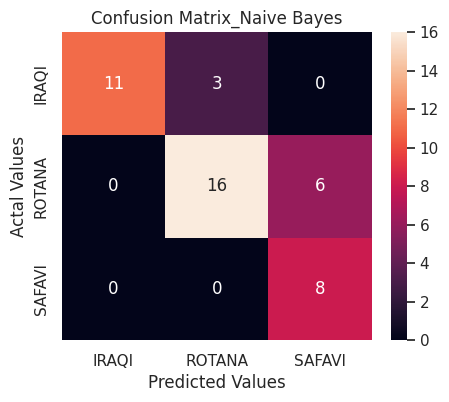

In [32]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_Naive Bayes')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [33]:
#Confusion matrix for k-NN classification algorithm
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
cm=confusion_matrix(KNN_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['IRAQI','ROTANA','SAFAVI'],
                  columns=['IRAQI','ROTANA','SAFAVI'])

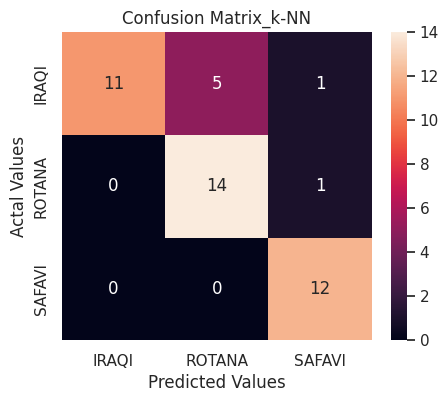

In [34]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_k-NN')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**bar chart**

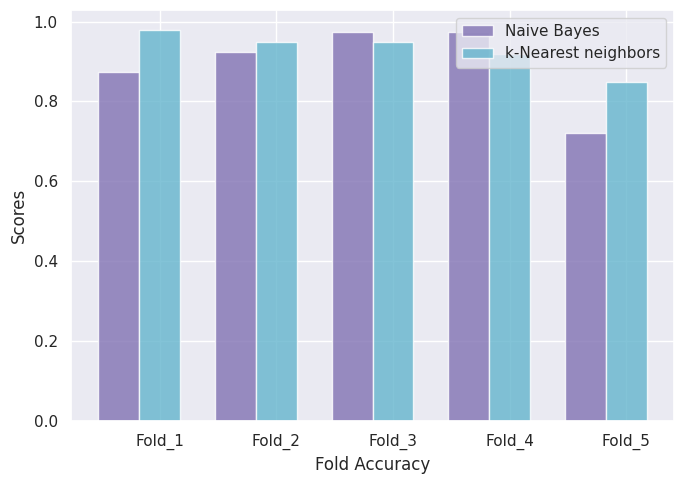

In [35]:
n_groups =5
KNN = (0.98, 0.95, 0.95, 0.92,0.85)
NB = (0.875, 0.925, 0.975, 0.975,0.72)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width,
alpha=opacity,
color='m',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width,KNN, bar_width,
alpha=opacity,
color='c',
label='k-Nearest neighbors')

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()